<a href="https://colab.research.google.com/github/LSDtopotools/lsdtt_notebooks/blob/master/lsdtopotools/basic_examples/making_a_pretty_channel_network_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making a pretty channel network image

*Written by Simon M Mudd, last update 20/09/2023*

If you like maps and are on social media, you will probably have come across a figure of channel networks that look something like this:

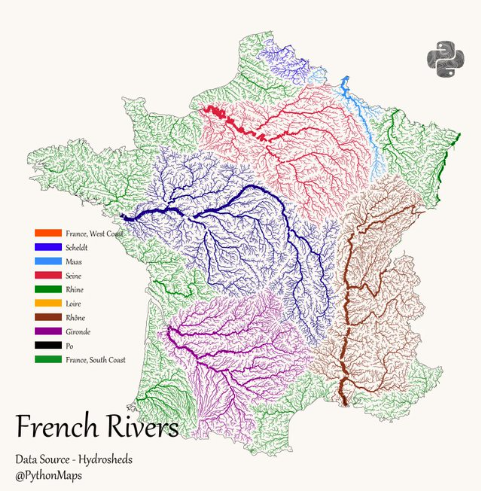

In this notebook I will show you how to make one of these maps using `lsdtopotools`.

## If you are on colab

**If you are in the `docker_lsdtt_pytools` docker container, you do not need to do any of this.
The following is for executing this code in the google colab environment only.**

If you are in the docker container you can skip to the **First get data** section.

First we install `lsdviztools`. This will take around a minute. It is important you do this before the `condacolab` step.

In [ ]:
!pip install lsdviztools &> /dev/null

Now we need to install lsdtopotools. We do this using something called `mamba`. To get `mamba` we install something called `condacolab`.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


Now use mamba to install `lsdtopotools`.
This step takes a bit over a minute.

In [ ]:
!mamba install -y lsdtopotools &> /dev/null

## Now get some data

We need to get some data to download.

For this example we will work on the island of Gran Canaria

We are going to download data using the opentopography scraper that is included with `lsdviztools`. You will need to get an opentopography.org account and copy in your API key.

You can sign up to an opentopography.org account here: https://portal.opentopography.org/myopentopo

In [ ]:
import lsdviztools.lsdbasemaptools as bmt
from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio

# YOU NEED TO PUT YOUR API KEY IN A FILE
your_OT_api_key_file = "my_OT_api_key.txt"

with open(your_OT_api_key_file, 'r') as file:
    print("I am reading you OT API key from the file "+your_OT_api_key_file)
    api_key = file.read().rstrip()
    print("Your api key starts with: "+api_key[0:4])

Dataset_prefix = "gc"
source_name = "COP30"

Xian_DEM = bmt.ot_scraper(source = source_name,
                        lower_left_coordinates = [27.684013671941845, -15.91532952791079],
                        upper_right_coordinates = [28.24560123694505, -15.289108845434836],
                        prefix = Dataset_prefix,
                        api_key_file = your_OT_api_key_file)
Xian_DEM.print_parameters()
Xian_DEM.download_pythonic()
DataDirectory = "./"
Fname = Dataset_prefix+"_"+source_name+".tif"
gio.convert4lsdtt(DataDirectory,Fname)

I am reading you OT API key from the file my_OT_api_key.txt
Your api key starts with: 9515
I am taking your coordinates from the lower left list
I am taking your coordinates from the upper right list
I am reading you OT API key from the file my_OT_api_key.txt
The source is: COP30
The west longitude is: -15.91532952791079
The east longitude is: -15.289108845434836
The south latitude is: 28.24560123694505
The north latitude is: 27.684013671941845
The path is: ./
The prefix is: gc
The resolution is: 30
I am going to download the following for you:
https://portal.opentopography.org/API/globaldem?demtype=COP30&south=27.684013671941845&north=28.24560123694505&west=-15.91532952791079&east=-15.289108845434836&outputFormat=GTiff&API_Key=951579bc84bc38a5894d4d43750aac09
This might take a little while, depending on the size of the file. 
The filename will be:
./gc_COP30.tif
The path and file without path are:
./  gc_COP30.tif
Finished downloading
The projections is:
GEOGCS["WGS 84",DATUM["WGS_198

'gc_COP30_UTM.bil'

## Extract basins using an algorithm

We are going to use `lsdtopotools` to extract some basins. We start with minimal parameters:

In [120]:
import lsdviztools.lsdmapwrappers as lsdmw

## Get the basins
lsdtt_parameters = {"print_basin_raster" : "true",
                    "write_hillshade" : "true",
                    "print_chi_data_maps" : "true"}
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool = "lsdtt-basic-metrics",
                                 read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: gc_COP30_UTM
The write prefix is: gc_COP30_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'write_hillshade': 'true', 'print_chi_data_maps': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


We would like to see if this has extracted the basins we want, so lets plot the image:

Basin keys are: 
[0, 1, 2, 3, 4, 5, 6, 7]
I'm going to make the basin plots. Your topographic data must be in ENVI bil format or I'll break!!
Your colourbar will be located: None
xsize: 2064 and y size: 2085
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32628
EPSG:32628
The EPSGString is: EPSG:32628
minimum values are x: 409716.0 and y: 3062209.0
I made the ticks.
x labels are: 
['410', '420', '430', '440', '450', '460', '470']
x locations are:
[410000.0, 420000.0, 430000.0, 440000.0, 450000.0, 460000.0, 470000.0]
y labels are: 
['3070', '3080', '3090', '3100', '3110', '3120']
y locations are:
[3070000.0, 3080000.0, 3090000.0, 3100000.0, 3110000.0, 3120000.0]
This colourmap is: gray


/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:456: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:457: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
Welcome to the basin plotting subroutine. I will plot some basins for you
This version does not rely on descartes
gc_COP30_UTM_AllBasins.bil
Let me grab the coordinate reference system.
EPSG:32628
Whoops. Found a repeated ID. Getting rid of the smaller one.
Found a repeated ID. Keeping the one with area of 92209500.0
I need to convert the crs to wkt format so it is resistant to stupid proj errors.
ID is: 72.0
ID is: 132.0
ID is: 288.0
ID is: 267.0
ID is: 582.0
ID is: 479.0
ID is: 444.0
ID is: 612.0
The number of basins are: 8
The number of points are: 8
Plotting the polygons, colouring by basin...I am using the geopandas version
72.0 72
132.0 132
288.0 288
267.0 267
582.0 582
479.0 479
444.0 444
612.0 612
The aspect ratio is: 0.9899280575539569
I need to adjust the spacing of the colourbar.
The cbar characters are: 0 and the cbar text width is: 0.4
No colourbar
The figure size is: 
[6.25, 6.102906976744186]
Map axes are:
[0.136, 0.1

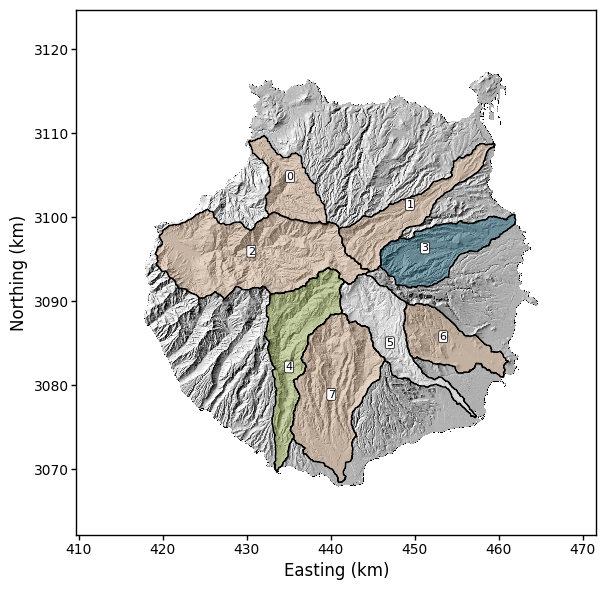

In [122]:
# uncomment this for debugging
#import lsdviztools.lsdmapwrappers as lsdmw
DataDirectory = "./"
Dataset_prefix = "gc"
source_name = "COP30"
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
Base_file = r_prefix

#%%capture
basins_img = lsdmw.PrintBasins_Complex(DataDirectory,Base_file,cmap="gist_earth",
                             size_format="geomorphology",dpi=600, save_fig = False)
basins_img

## Refining basin selection

Lets say you want to change the number of basins. You could pick the latitude and longitude of the outlets. But that would require a lot of mouse clicks. We can look at the data to see if we can select a different number of basins algorithmically.

Algorithmic selection of basins selects by the contributing pixels in each basin. We need to get some idea of how many pixels there are in the basins. We do that by loading the chi map (we printed that out using `print_chi_data_maps` in the above `lsdtt` call) and looking at the drainage area.

First we get the unique basin numbers (we call these `basin_key`:

In [123]:
import pandas as pd
import numpy as np
df = pd.read_csv("gc_COP30_UTM_chi_data_map.csv")
df.head()

basin_keys = df["basin_key"].values
unique_keys = np.unique(basin_keys)
print(unique_keys)

[0 1 2 3 4 5 6 7]


Then using some `pandas` magic we get the largest basin:

In [ ]:
basin_new = df.loc[df.groupby('basin_key')['drainage_area'].nlargest(1).reset_index(0).index]
basin_new.head(10)

latitude  longitude       chi  elevation  flow_distance  drainage_area  \
700   28.103392 -15.411978  0.003720    0.98546         30.000     65020000.0   
2020  28.001918 -15.817697  0.004523    2.99470         60.000    175990000.0   
3470  28.027906 -15.387580  0.003576    0.49297         30.000     70389000.0   
4724  27.752190 -15.675186  0.007542    3.14650         72.426     92210000.0   
5741  27.810845 -15.433103  0.005194    1.78480         42.426     66729000.0   
6264  27.853192 -15.400363  0.003971    0.42356         30.000     57067000.0   
7103  27.739829 -15.595058  0.005235    0.82157         60.000    131340000.0   

      source_key  basin_key  
700            0          0  
2020           5          1  
3470          15          2  
4724          20          3  
5741          24          4  
6264          28          5  
7103          32          6

Then, because this is a 30m DEM (it is actually not quite 30m but close enough), we can get the number of pixels in each basin with another python call:

In [124]:
basin_new["area_in_pixels"] = np.divide(basin_new.drainage_area, 30*30)
basin_new.head(10)

latitude  longitude       chi  elevation  flow_distance  drainage_area  \
700   28.103392 -15.411978  0.003720    0.98546         30.000     65020000.0   
2020  28.001918 -15.817697  0.004523    2.99470         60.000    175990000.0   
3470  28.027906 -15.387580  0.003576    0.49297         30.000     70389000.0   
4724  27.752190 -15.675186  0.007542    3.14650         72.426     92210000.0   
5741  27.810845 -15.433103  0.005194    1.78480         42.426     66729000.0   
6264  27.853192 -15.400363  0.003971    0.42356         30.000     57067000.0   
7103  27.739829 -15.595058  0.005235    0.82157         60.000    131340000.0   

      source_key  basin_key  area_in_pixels  
700            0          0    72244.444444  
2020           5          1   195544.444444  
3470          15          2    78210.000000  
4724          20          3   102455.555556  
5741          24          4    74143.333333  
6264          28          5    63407.777778  
7103          32          6   145933.333333

Okay, so the basins hat we got the first time are on the order of 70000 pixels. We can use that to control how many basins we get with some additional parameters. We can get more basins by selecting a smaller `minimum_basin_size_pixels`.

We can also adjust the number of channels by changing another paramter called `threshold_contributing_pixels`.

In [127]:
import lsdviztools.lsdmapwrappers as lsdmw

## Get the basins
lsdtt_parameters = {"print_basin_raster" : "true",
                    "write_hillshade" : "true",
                    "threshold_contributing_pixels" : "1000",
                    "minimum_basin_size_pixels" : "30000",
                    "maximum_basin_size_pixels" : "1000000000",
                    "print_chi_data_maps" : "true"}
r_prefix = Dataset_prefix+"_"+source_name +"_UTM"
w_prefix = Dataset_prefix+"_"+source_name +"_UTM"
lsdtt_drive = lsdmw.lsdtt_driver(command_line_tool = "lsdtt-basic-metrics",
                                 read_prefix = r_prefix,
                                 write_prefix= w_prefix,
                                 read_path = "./",
                                 write_path = "./",
                                 parameter_dictionary=lsdtt_parameters)
lsdtt_drive.print_parameters()
lsdtt_drive.run_lsdtt_command_line_tool()

The lsdtopotools command line tools available are: 
['lsdtt-basic-metrics', 'lsdtt-channel-extraction', 'lsdtt-chi-mapping', 'lsdtt-cosmo-tool', 'lsdtt-hillslope-channel-coupling', 'lsdtt-valley-metrics']
Testing has been done against lsdtopotools v0.7
The command line tool is: lsdtt-basic-metrics
The driver name is: Test_01
The read path is: ./
The write path is: ./
The read prefix is: gc_COP30_UTM
The write prefix is: gc_COP30_UTM
The parameter dictionary is:
{'print_basin_raster': 'true', 'write_hillshade': 'true', 'threshold_contributing_pixels': '1000', 'minimum_basin_size_pixels': '30000', 'maximum_basin_size_pixels': '1000000000', 'print_chi_data_maps': 'true'}
Done writing the driver file
I've finised writing the driver file. Let me run LSDTT for you.


Lets now check to see how many basins we got:

In [128]:
df = pd.read_csv("gc_COP30_UTM_chi_data_map.csv")
df.head()

basin_keys = df["basin_key"].values
unique_keys = np.unique(basin_keys)
print(unique_keys)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


So when I set `minimum_basin_size_pixels` to `30000` I get 14 basins. I'll keep that.

## Showing the network with hillshade

We can then show the network with a call to an `lsdviztools` routine called `PrintPointsOverHillshade`. In this routine you can plot the "points" (that is the channel network) and control the size of the points.

If you scale by `drainage_area` the channels will get thicker as you go downstream. You can use the `max_point_size` and `min_point_size` variable to control this.

I can colour the points by any heading in the `chi_data_map.csv` file. Here is an example with the `chi` column. But in the next example I use the `basin_key` to colour by individual basins.

I'm also going to save this figure:

In [129]:
#%%capture
points_img = lsdmw.PrintPointsOverHillshade(DataDirectory,Base_file,cmap="gist_earth",
                                            points_fname = "gc_COP30_UTM_chi_data_map.csv",
                                            size_format="geomorphology",dpi=600,
                                            save_fig = True,
                                            column_for_plotting = "chi",
                                            column_for_scaling = "drainage_area",
                                            scaled_data_in_log = True,
                                            max_point_size = 14, min_point_size =5)

I am loading the points from: gc_COP30_UTM_chi_data_map.csv
I did not find a valid separator. I am assuming the path is ./
The object file prefix is: gc_COP30_UTM_chi_data_map
Loading your file from csv
done
I am getting the hillshade
Your colourbar will be located: None
xsize: 2064 and y size: 2085
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32628
EPSG:32628
The EPSGString is: EPSG:32628
minimum values are x: 409716.0 and y: 3062209.0
I made the ticks.
x labels are: 
['410', '420', '430', '440', '450', '460', '470']
x locations are:
[410000.0, 420000.0, 430000.0, 440000.0, 450000.0, 460000.0, 470000.0]
y labels are: 
['3070', '3080', '3090', '3100', '3110', '3120']
y locations are:
[3070000.0, 3080000.0, 3090000.0, 3100000.0, 3110000.0, 3120000.0]
This colourmap is: gray


/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:456: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.tick_x_labels)
/usr/local/lib/python3.10/dist-packages/lsdviztools/lsdmapfigure/plottingraster.py:457: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.tick_y_labels)


The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
Now I'll get some points
I am going to plot some points for you. The EPSG string is:EPSG:32628
pointtools GetUTMEastingNorthing, getting the epsg string: EPSG:32628
WARNING you must have a recent (>=6) version of proj and pyproj (>=2.4) for this to work 
EPSG:32628
I got the easting and northing
I also got the data for scaling, which is in column drainage_area
The size of the array is: 
(24183,)
I am going to convert data to log for point scaling.
I logged (is it a verb?) your scaled data, the minimum is 5.954242509439325 and the maximum is 8.24548799129027 but all the values inferior to -10 will be -10
I am scaling your points for you
max is: 8.24548799129027 and min is: 5.954242509439325
I have got a scaled point array,
I will plot the points now.
The colourmap is: gist_earth
I will colour by the points
The aspect ratio is: 0.9899280575539569
I need to adjust the spacing of the colourbar.
The cbar characters are: 0 and the cbar te

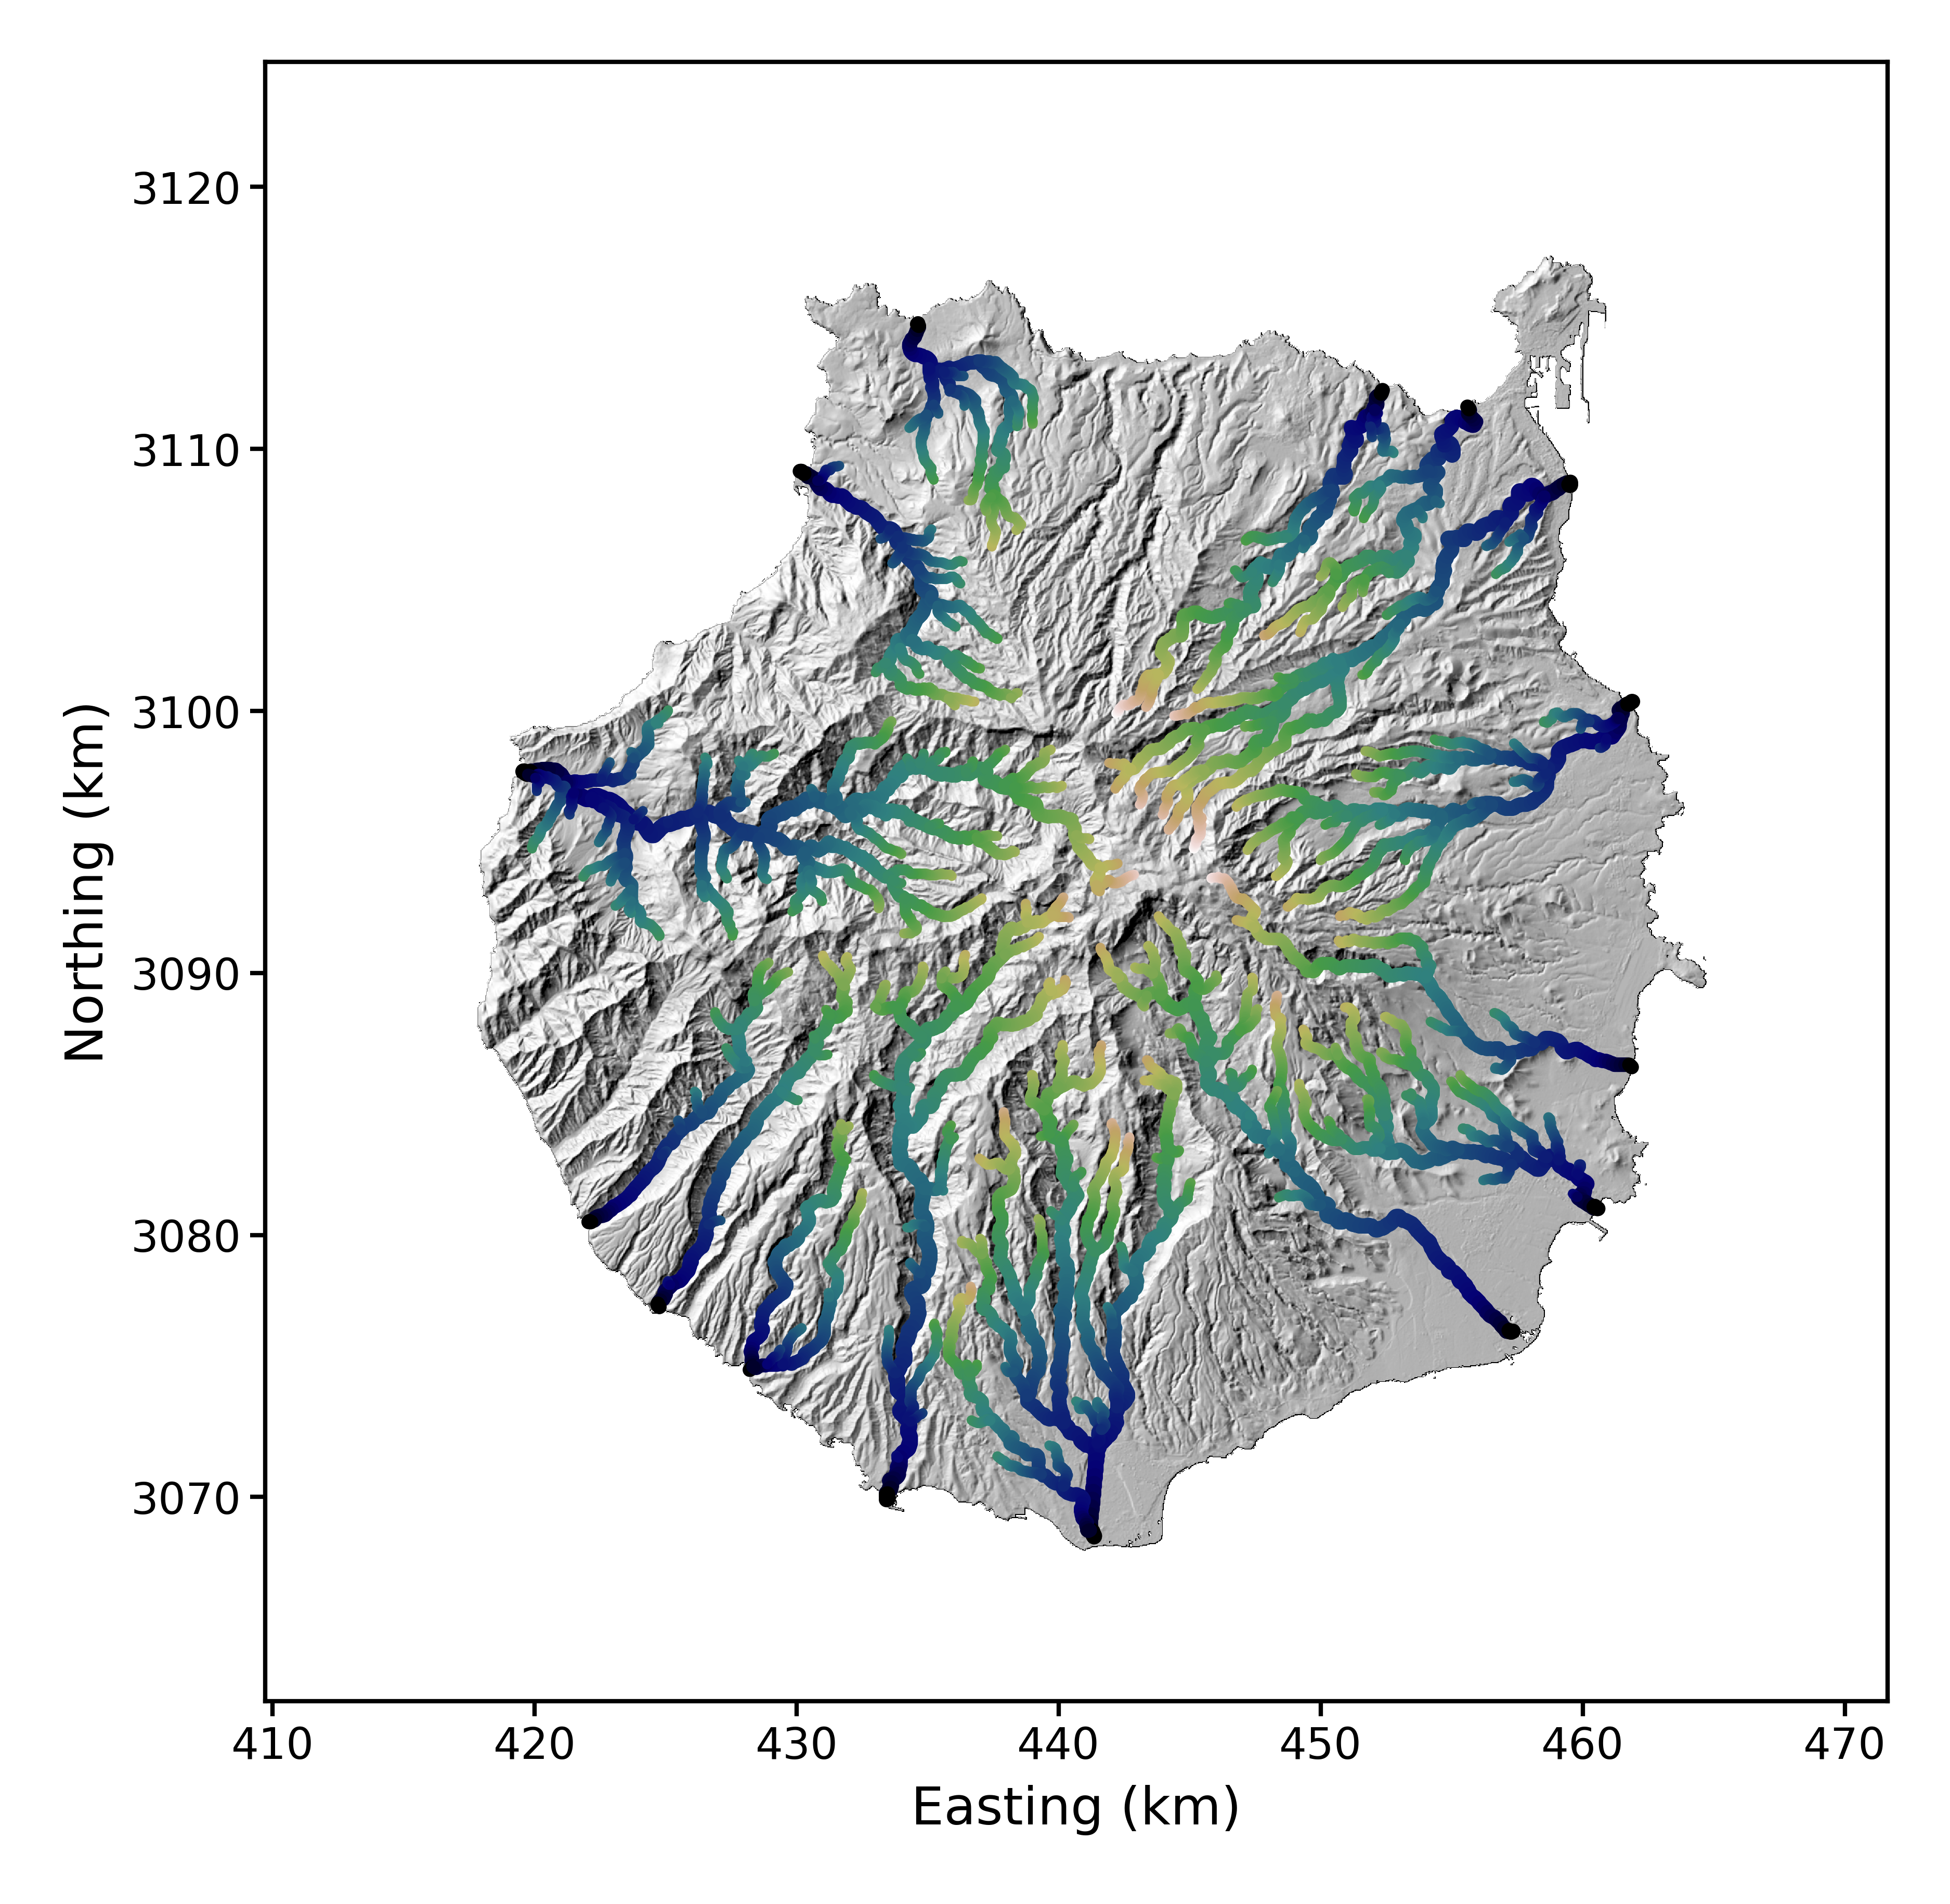

In [130]:
from IPython.display import display, Image
display(Image(filename=points_img, width=800))

## Make a pretty river network image

Okay, now lets reproduce the style of those river network images from social media.

We want:
* Each river basin a different colour
* No background image (but actually I will have a very light hillshade since I think it looks good).
* No axis labels or ticks.
* Rivers getting thicker as they gain area.

To do this we need to delve a bit deeper into `lsdviztools`.

In [133]:
from lsdviztools.lsdplottingtools import lsdmap_pointtools as LSDP
from lsdviztools.lsdmapfigure.plottingraster import MapFigure

thisPointData = LSDP.LSDMap_PointData("./gc_COP30_UTM_chi_data_map.csv")

# set up the base image and the map
print("I am getting the hillshade")

# If you want to turn off the background hillshade set alpha to 0
MF = MapFigure("gc_COP30_UTM_hs.bil", "./",coord_type="None", colourbar_location="None", alpha = 0.1)
MF.add_point_data(thisPointData,column_for_plotting = "basin_key",
                  scale_points = True,
                  column_for_scaling = "drainage_area",
                  this_colourmap = "jet",
                  scaled_data_in_log = True,
                  max_point_size = 20,
                  min_point_size = 2)
fig_name = MF.save_fig(fig_width_inches = 6, transparent=True, FigFileName = "awesome_network_image.png",
                       Fig_dpi = 600, return_fig = False)

The object file prefix is: gc_COP30_UTM_chi_data_map
Loading your file from csv
done
I am getting the hillshade
Your colourbar will be located: None
xsize: 2064 and y size: 2085
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32628
EPSG:32628
The EPSGString is: EPSG:32628
I made the ticks.
x labels are: 
[]
x locations are:
[]
y labels are: 
[]
y locations are:
[]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
I am going to plot some points for you. The EPSG string is:EPSG:32628
pointtools GetUTMEastingNorthing, getting the epsg string: EPSG:32628
WARNING you must have a recent (>=6) version of proj and pyproj (>=2.4) for this to work 
EPSG:32628
I got the easting and northing
I also got the data for scaling, which is in column drainage_area
The size of the array is: 
(24183,)
I am going to convert data to log for point scaling.
I logged (is it a verb?) your scaled data, the minimum is 5.954242509439325 and the maximum is 8.24548799129027 but all the values

Now lets show the image. It is a png so you can download your own network and post it on your favourite social network site.

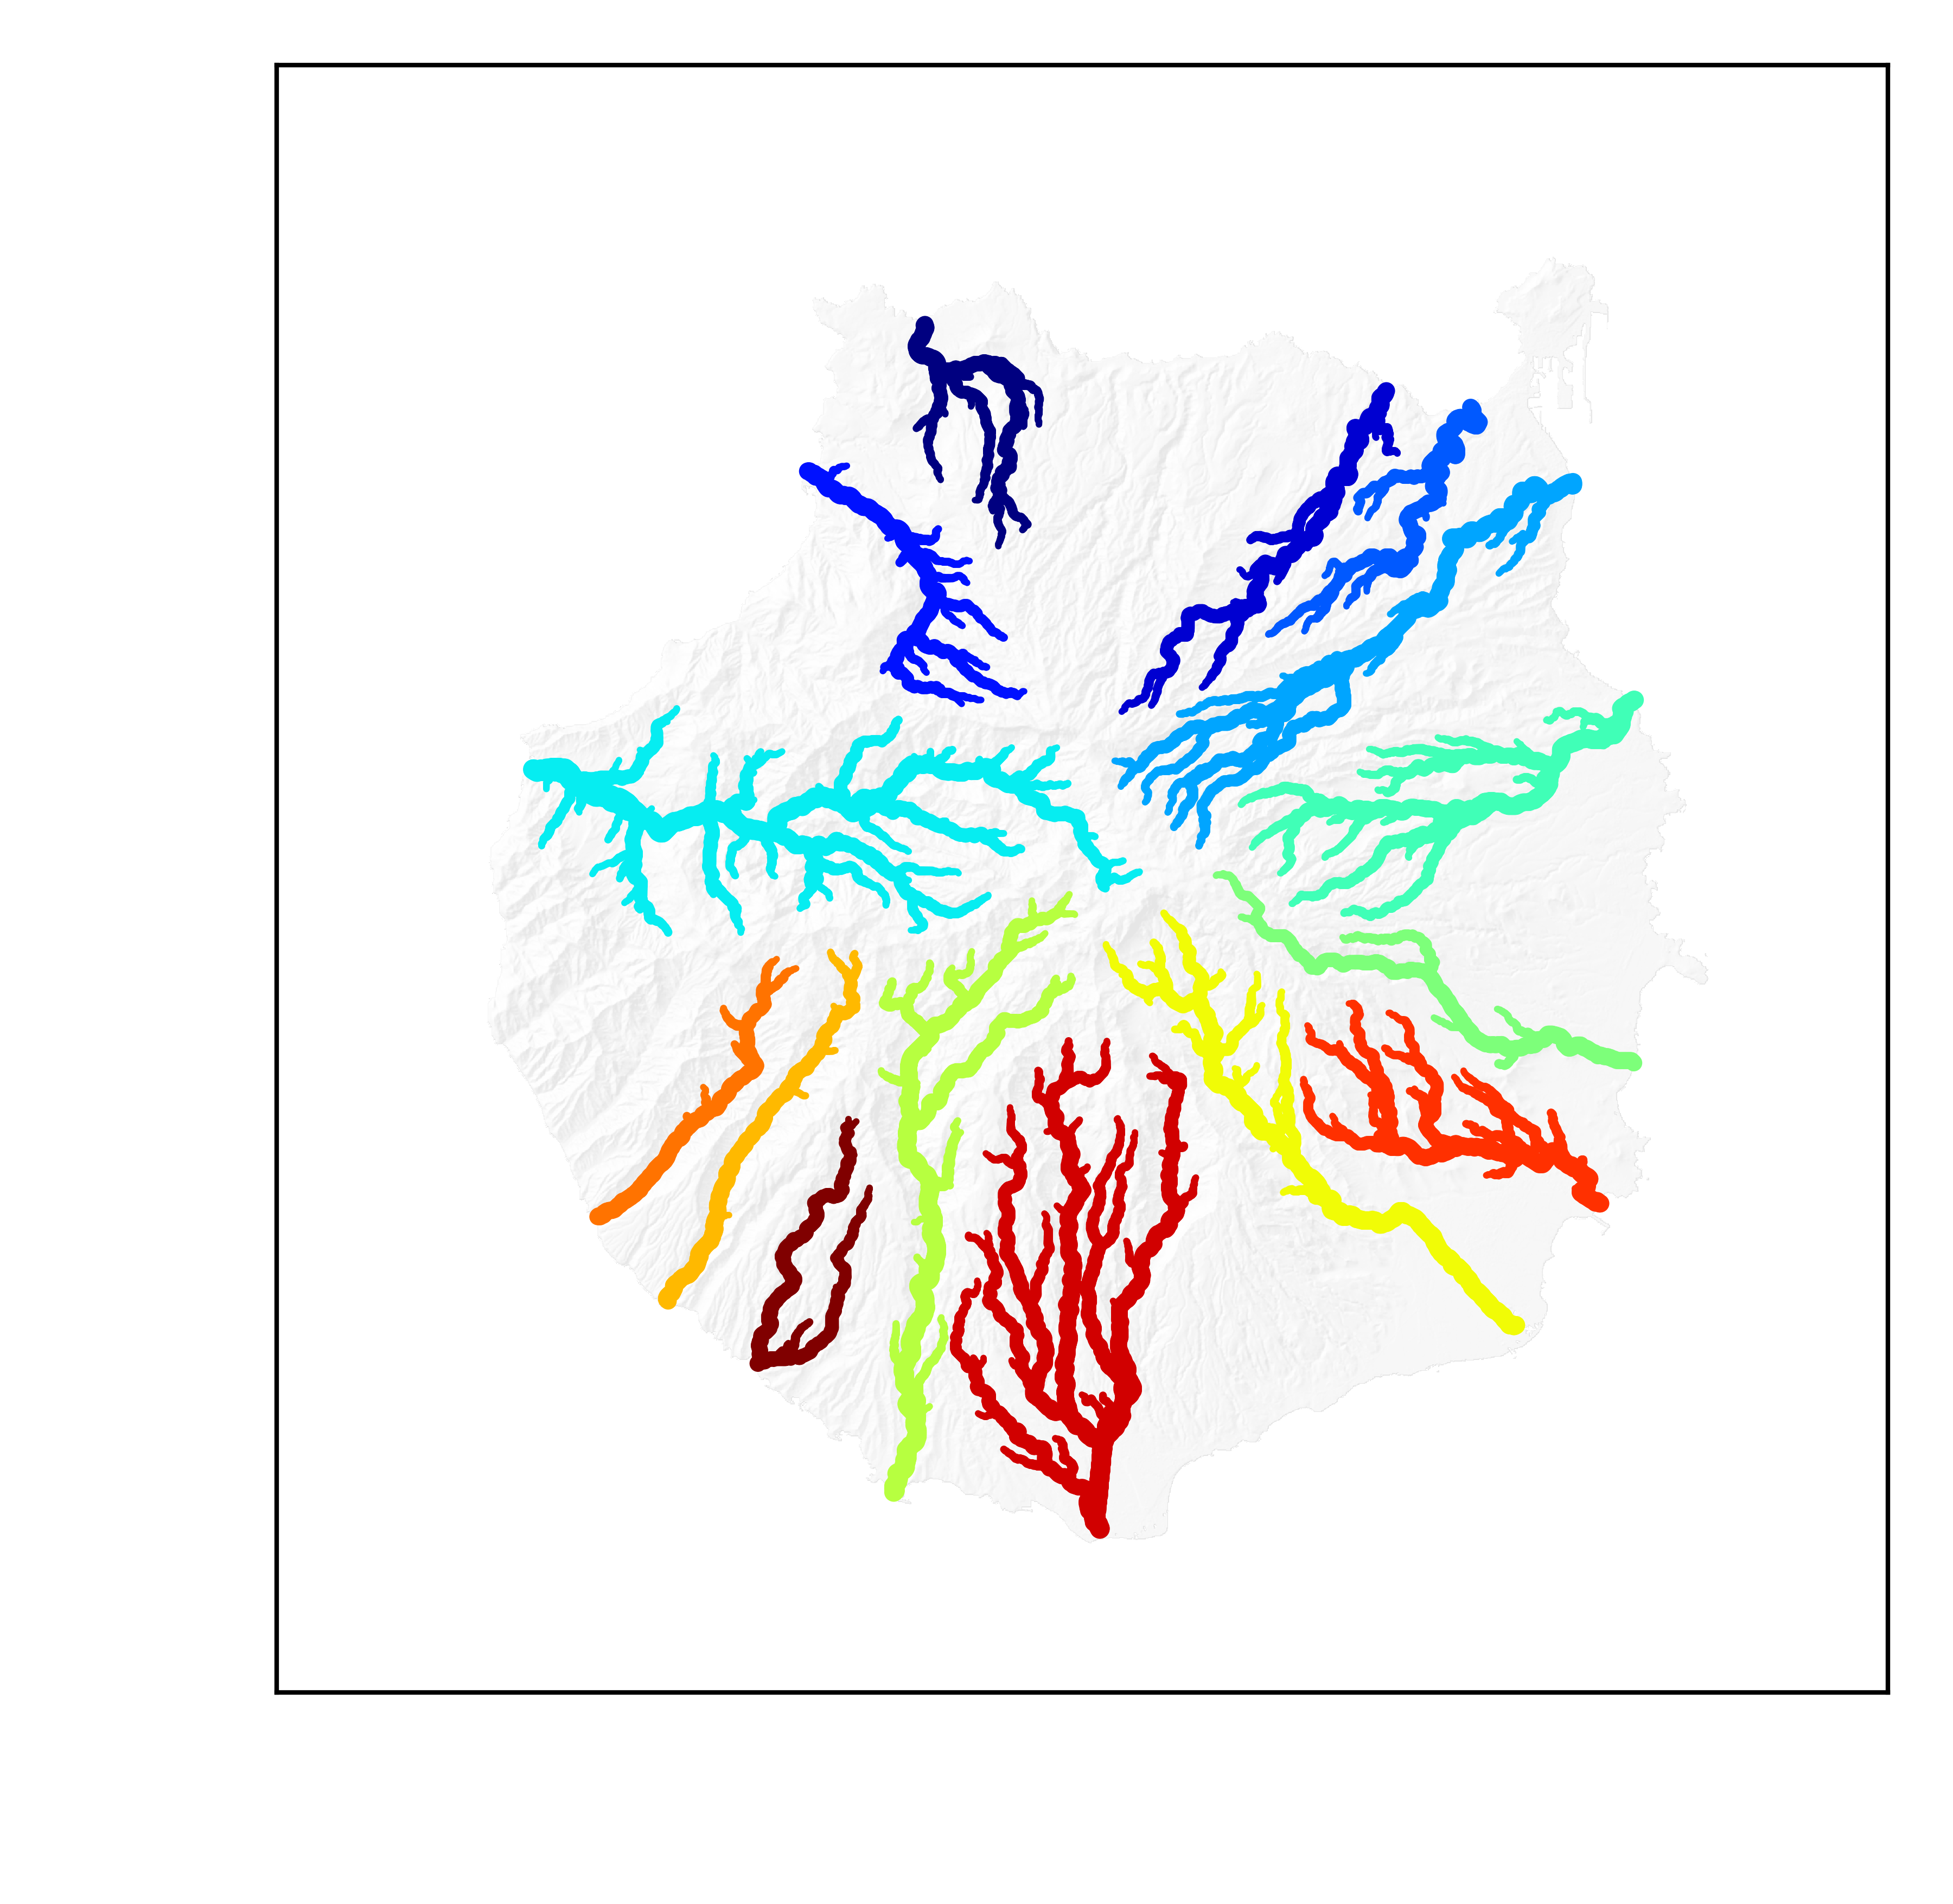

In [134]:
from IPython.display import display, Image
display(Image(filename="awesome_network_image.png", width=800))